# West Nile Virus Data Exploration

This notebook explores the West Nile Virus prediction dataset to understand patterns, distributions, and relationships in the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('default')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 8)

## 1. Data Loading

In [2]:
# Load datasets
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
weather_df = pd.read_csv('data/weather.csv')
spray_df = pd.read_csv('data/spray.csv')

print("Dataset shapes:")
print(f"Training data: {train_df.shape}")
print(f"Test data: {test_df.shape}")
print(f"Weather data: {weather_df.shape}")
print(f"Spray data: {spray_df.shape}")

Dataset shapes:
Training data: (10506, 12)
Test data: (116293, 11)
Weather data: (2944, 22)
Spray data: (14835, 4)


## 2. Training Data Overview

In [3]:
# Basic info about training data
print("Training Data Info:")
print(train_df.info())
print("\nFirst few rows:")
train_df.head()

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    10506 non-null  object 
 1   Address                 10506 non-null  object 
 2   Species                 10506 non-null  object 
 3   Block                   10506 non-null  int64  
 4   Street                  10506 non-null  object 
 5   Trap                    10506 non-null  object 
 6   AddressNumberAndStreet  10506 non-null  object 
 7   Latitude                10506 non-null  float64
 8   Longitude               10506 non-null  float64
 9   AddressAccuracy         10506 non-null  int64  
 10  NumMosquitos            10506 non-null  int64  
 11  WnvPresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB
None

First few rows:


,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [4]:
# Summary statistics
print("Training Data Summary:")
train_df.describe()

Training Data Summary:


,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
count,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000
mean,35.687797,41.841139,-87.699908,7.819532,12.853512,0.052446
std,24.339468,0.112742,0.096514,1.452921,16.133816,0.222936
min,10.000000,41.644612,-87.930995,3.000000,1.000000,0.000000
25%,12.000000,41.732984,-87.760070,8.000000,2.000000,0.000000
50%,33.000000,41.846283,-87.694991,8.000000,5.000000,0.000000
75%,52.000000,41.954690,-87.627796,9.000000,17.000000,0.000000
max,98.000000,42.017430,-87.531635,9.000000,50.000000,1.000000


In [5]:
# Check for missing values
print("Missing values in training data:")
missing_values = train_df.isnull().sum()
missing_values[missing_values > 0]

Missing values in training data:


Series([], dtype: int64)

## 3. Target Variable Analysis (WnvPresent)

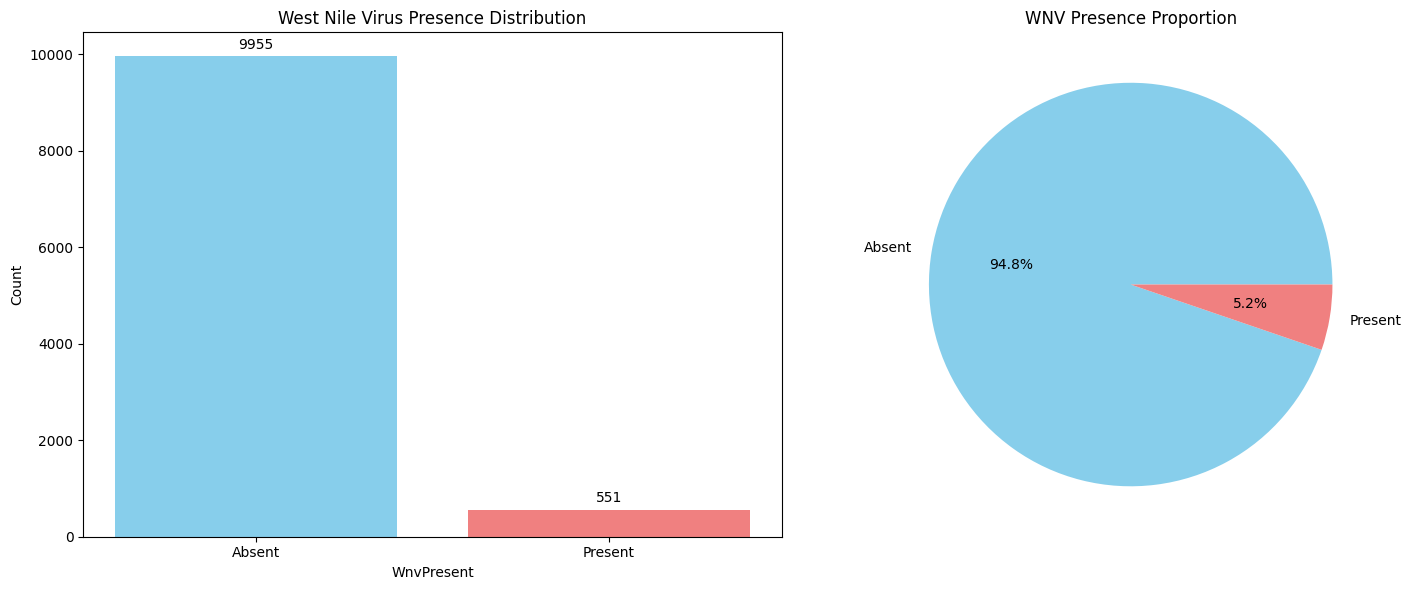

Total samples: 10,506
Positive samples (WNV Present): 551 (5.24%)
Negative samples (WNV Absent): 9,955 (94.76%)
Class imbalance ratio: 18.1:1


In [6]:
# Target variable distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Count plot
wnv_counts = train_df['WnvPresent'].value_counts()
axes[0].bar(wnv_counts.index, wnv_counts.values, color=['skyblue', 'lightcoral'])
axes[0].set_title('West Nile Virus Presence Distribution')
axes[0].set_xlabel('WnvPresent')
axes[0].set_ylabel('Count')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Absent', 'Present'])

# Add count labels
for i, v in enumerate(wnv_counts.values):
    axes[0].text(i, v + 100, str(v), ha='center', va='bottom')

# Pie chart
axes[1].pie(wnv_counts.values, labels=['Absent', 'Present'], autopct='%1.1f%%', 
           colors=['skyblue', 'lightcoral'])
axes[1].set_title('WNV Presence Proportion')

plt.tight_layout()
plt.show()

# Print statistics
total_samples = len(train_df)
positive_samples = train_df['WnvPresent'].sum()
negative_samples = total_samples - positive_samples
imbalance_ratio = negative_samples / positive_samples

print(f"Total samples: {total_samples:,}")
print(f"Positive samples (WNV Present): {positive_samples:,} ({positive_samples/total_samples*100:.2f}%)")
print(f"Negative samples (WNV Absent): {negative_samples:,} ({negative_samples/total_samples*100:.2f}%)")
print(f"Class imbalance ratio: {imbalance_ratio:.1f}:1")

## 4. Species Analysis

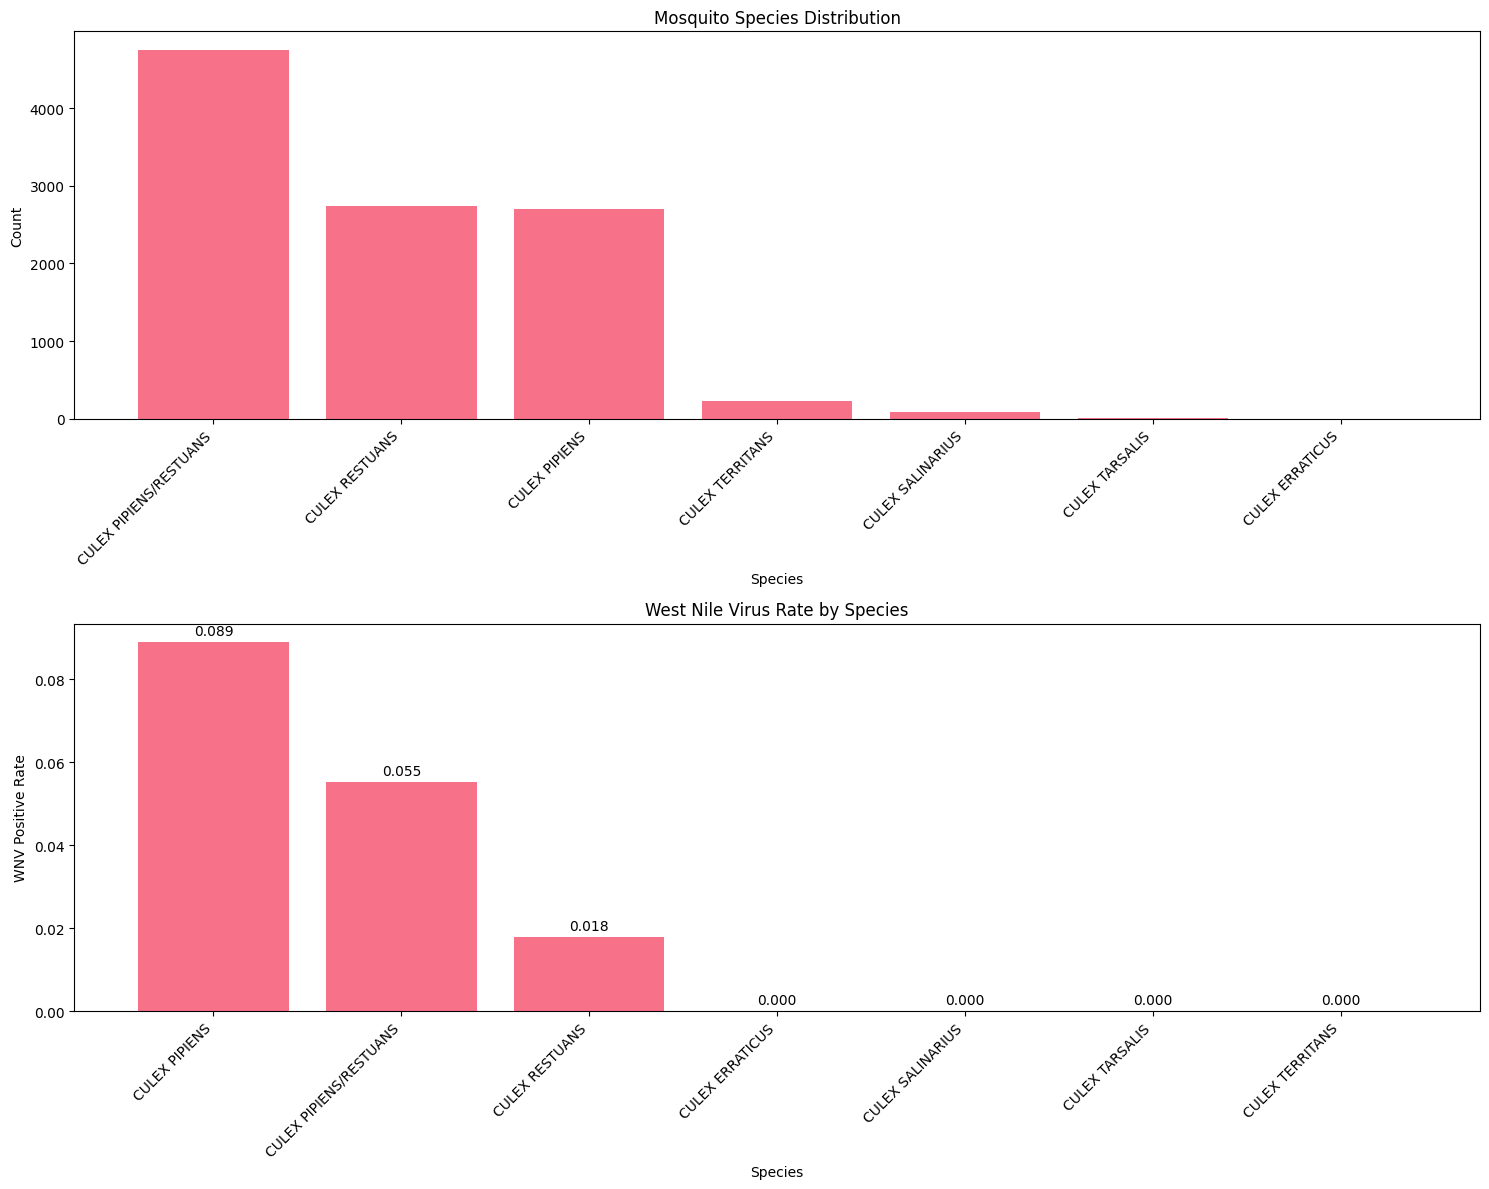


West Nile Virus by Species:
               Species  Total_Samples  WNV_Positive  WNV_Rate
         CULEX PIPIENS           2699           240  0.088922
CULEX PIPIENS/RESTUANS           4752           262  0.055135
        CULEX RESTUANS           2740            49  0.017883
       CULEX ERRATICUS              1             0  0.000000
      CULEX SALINARIUS             86             0  0.000000
        CULEX TARSALIS              6             0  0.000000
       CULEX TERRITANS            222             0  0.000000


In [7]:
# Species distribution
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# Overall species count
species_counts = train_df['Species'].value_counts()
axes[0].bar(range(len(species_counts)), species_counts.values)
axes[0].set_title('Mosquito Species Distribution')
axes[0].set_xlabel('Species')
axes[0].set_ylabel('Count')
axes[0].set_xticks(range(len(species_counts)))
axes[0].set_xticklabels(species_counts.index, rotation=45, ha='right')

# WNV presence by species
species_wnv = train_df.groupby('Species')['WnvPresent'].agg(['count', 'sum', 'mean']).reset_index()
species_wnv.columns = ['Species', 'Total_Samples', 'WNV_Positive', 'WNV_Rate']
species_wnv = species_wnv.sort_values('WNV_Rate', ascending=False)

bars = axes[1].bar(range(len(species_wnv)), species_wnv['WNV_Rate'])
axes[1].set_title('West Nile Virus Rate by Species')
axes[1].set_xlabel('Species')
axes[1].set_ylabel('WNV Positive Rate')
axes[1].set_xticks(range(len(species_wnv)))
axes[1].set_xticklabels(species_wnv['Species'], rotation=45, ha='right')

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.001,
                f'{height:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\nWest Nile Virus by Species:")
print(species_wnv.to_string(index=False))

## 5. Temporal Analysis

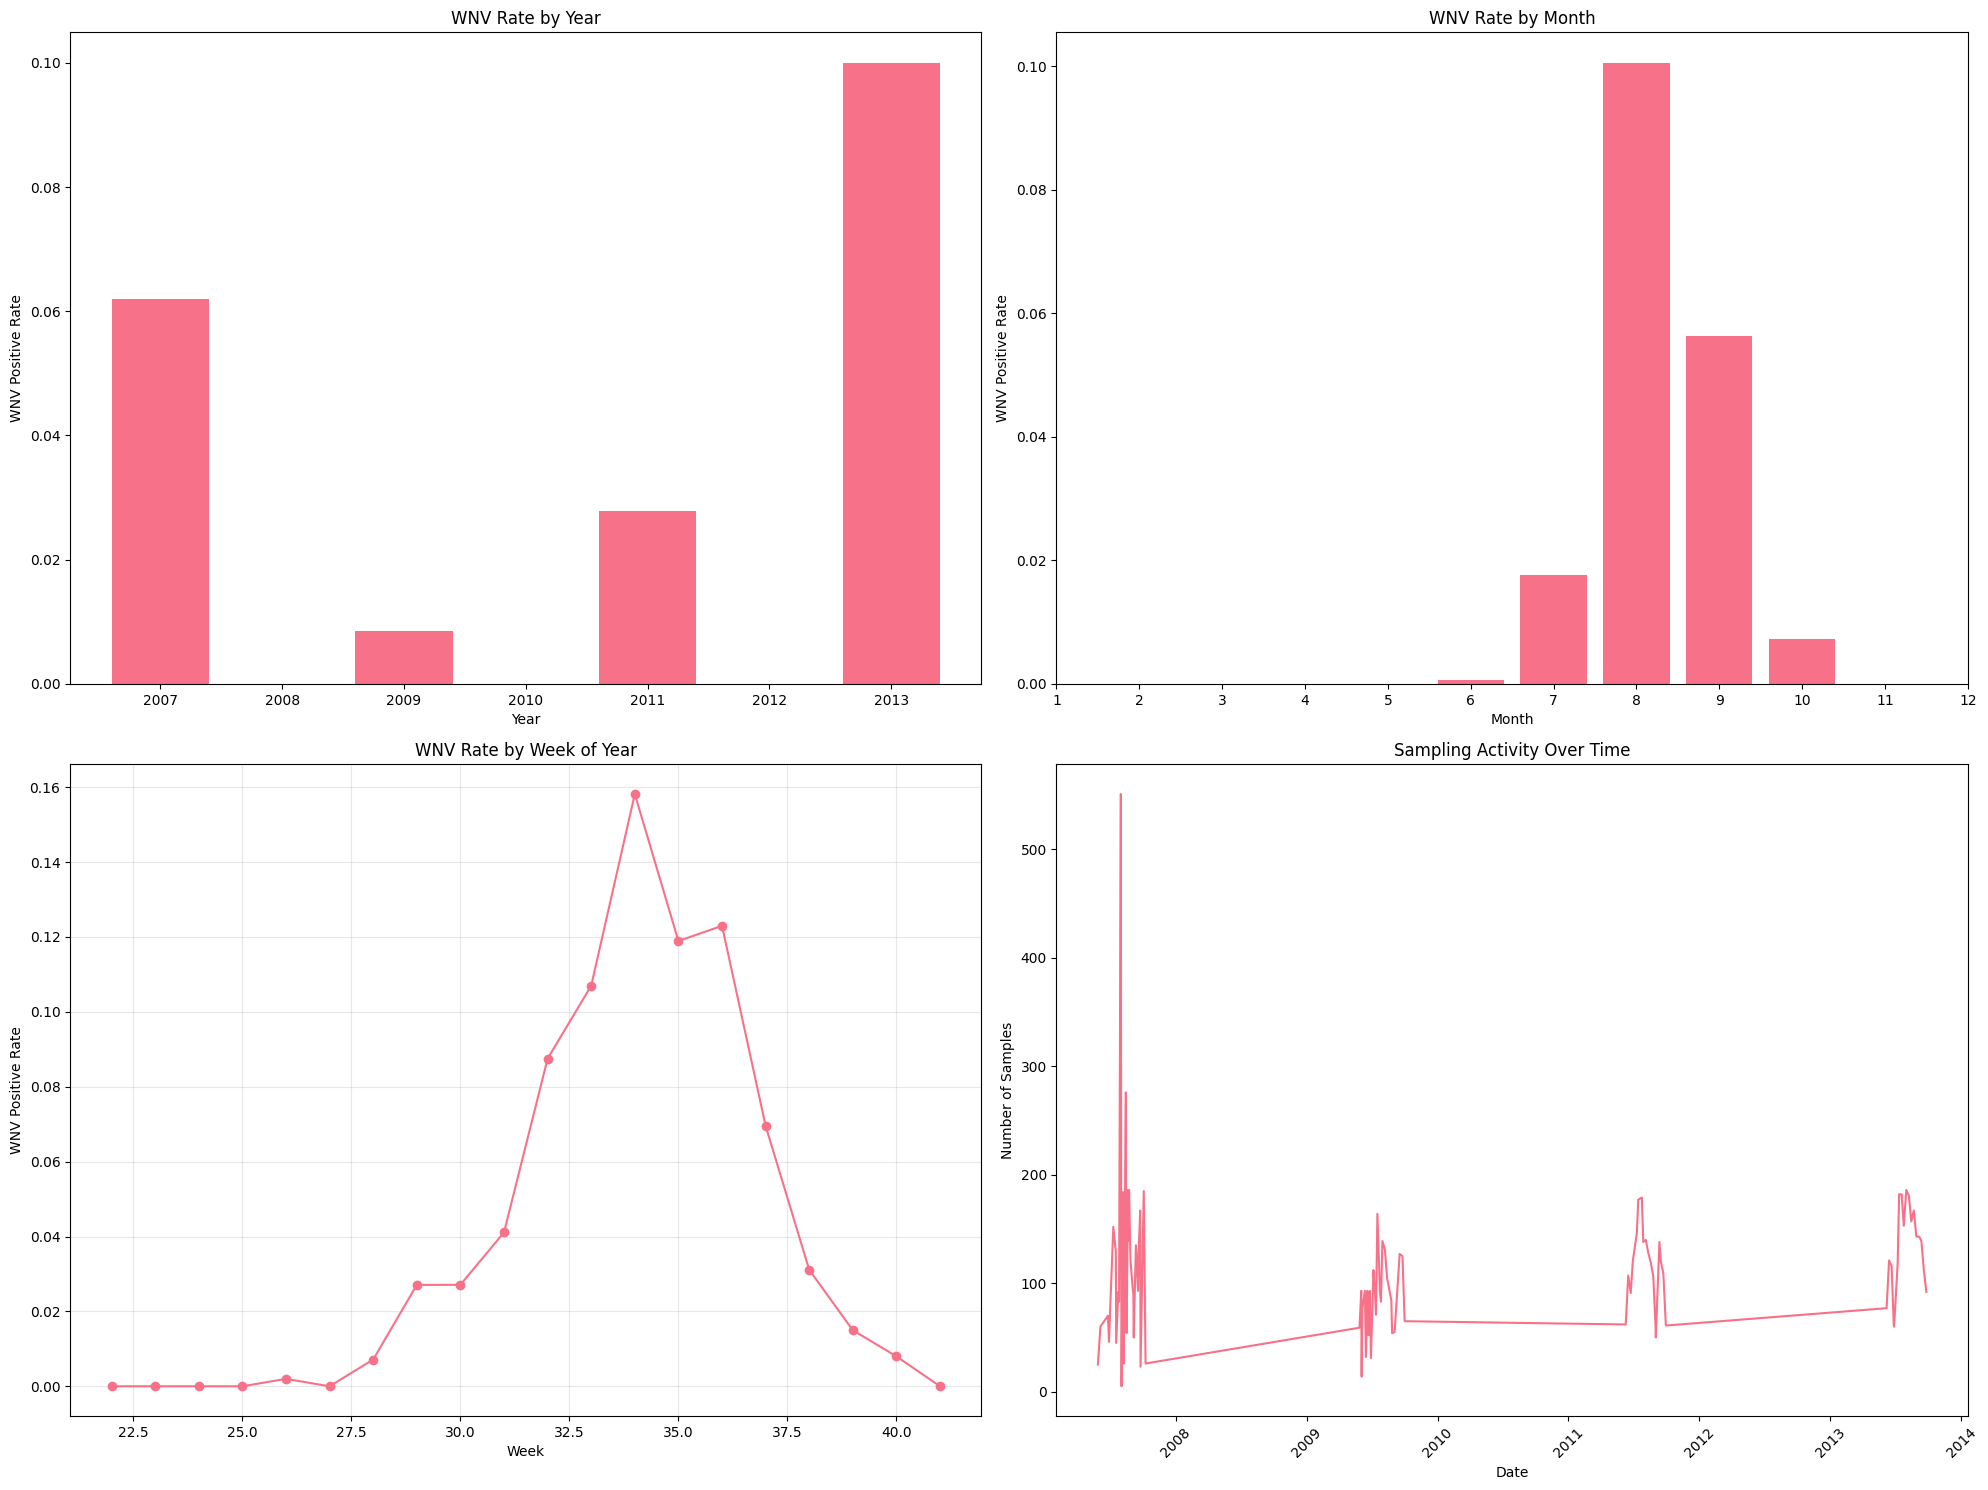


WNV Rate by Year:
 Year  Total_Samples  WNV_Positive  WNV_Rate
 2007           3811           236  0.061926
 2009           2249            19  0.008448
 2011           2054            57  0.027751
 2013           2392           239  0.099916

WNV Rate by Month:
 Month  Total_Samples  WNV_Positive  WNV_Rate
     5             84             0  0.000000
     6           1571             1  0.000637
     7           2606            46  0.017652
     8           3751           377  0.100507
     9           2218           125  0.056357
    10            276             2  0.007246


In [8]:
# Convert Date column to datetime
train_df['Date'] = pd.to_datetime(train_df['Date'])
train_df['Year'] = train_df['Date'].dt.year
train_df['Month'] = train_df['Date'].dt.month
train_df['DayOfYear'] = train_df['Date'].dt.dayofyear
train_df['Week'] = train_df['Date'].dt.isocalendar().week

fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# WNV by Year
yearly_wnv = train_df.groupby('Year')['WnvPresent'].agg(['count', 'sum', 'mean']).reset_index()
yearly_wnv.columns = ['Year', 'Total_Samples', 'WNV_Positive', 'WNV_Rate']

bars1 = axes[0,0].bar(yearly_wnv['Year'], yearly_wnv['WNV_Rate'])
axes[0,0].set_title('WNV Rate by Year')
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('WNV Positive Rate')

# WNV by Month
monthly_wnv = train_df.groupby('Month')['WnvPresent'].agg(['count', 'sum', 'mean']).reset_index()
monthly_wnv.columns = ['Month', 'Total_Samples', 'WNV_Positive', 'WNV_Rate']

bars2 = axes[0,1].bar(monthly_wnv['Month'], monthly_wnv['WNV_Rate'])
axes[0,1].set_title('WNV Rate by Month')
axes[0,1].set_xlabel('Month')
axes[0,1].set_ylabel('WNV Positive Rate')
axes[0,1].set_xticks(range(1, 13))

# WNV by Week
weekly_wnv = train_df.groupby('Week')['WnvPresent'].agg(['count', 'sum', 'mean']).reset_index()
weekly_wnv.columns = ['Week', 'Total_Samples', 'WNV_Positive', 'WNV_Rate']

axes[1,0].plot(weekly_wnv['Week'], weekly_wnv['WNV_Rate'], marker='o')
axes[1,0].set_title('WNV Rate by Week of Year')
axes[1,0].set_xlabel('Week')
axes[1,0].set_ylabel('WNV Positive Rate')
axes[1,0].grid(True, alpha=0.3)

# Sample count over time
date_counts = train_df.groupby('Date').size().reset_index(name='Count')
axes[1,1].plot(date_counts['Date'], date_counts['Count'])
axes[1,1].set_title('Sampling Activity Over Time')
axes[1,1].set_xlabel('Date')
axes[1,1].set_ylabel('Number of Samples')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\nWNV Rate by Year:")
print(yearly_wnv.to_string(index=False))
print("\nWNV Rate by Month:")
print(monthly_wnv.to_string(index=False))

## 6. Geographic Analysis

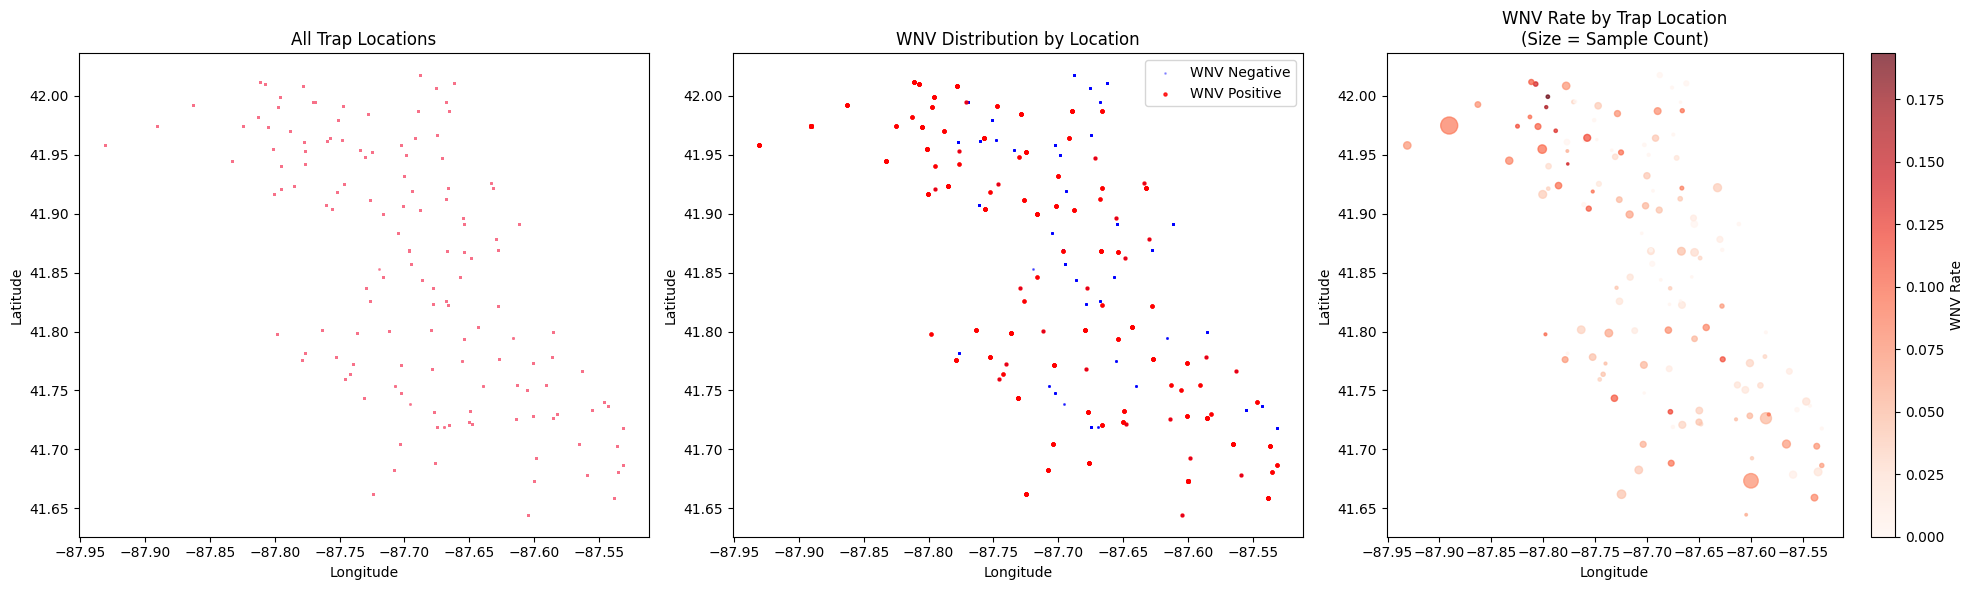


Total unique trap locations: 130
Traps with WNV positive samples: 98
Highest WNV rate: 0.194
Average WNV rate across traps: 0.045


In [9]:
# Geographic distribution
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# All samples scatter plot
axes[0].scatter(train_df['Longitude'], train_df['Latitude'], alpha=0.5, s=1)
axes[0].set_title('All Trap Locations')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')

# WNV positive samples
wnv_positive = train_df[train_df['WnvPresent'] == 1]
wnv_negative = train_df[train_df['WnvPresent'] == 0]

axes[1].scatter(wnv_negative['Longitude'], wnv_negative['Latitude'], 
               alpha=0.3, s=1, color='blue', label='WNV Negative')
axes[1].scatter(wnv_positive['Longitude'], wnv_positive['Latitude'], 
               alpha=0.8, s=5, color='red', label='WNV Positive')
axes[1].set_title('WNV Distribution by Location')
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')
axes[1].legend()

# Trap locations with WNV rates
trap_wnv = train_df.groupby(['Latitude', 'Longitude'])['WnvPresent'].agg(['count', 'sum', 'mean']).reset_index()
trap_wnv.columns = ['Latitude', 'Longitude', 'Total_Samples', 'WNV_Positive', 'WNV_Rate']
trap_wnv = trap_wnv[trap_wnv['Total_Samples'] >= 10]  # Filter traps with sufficient samples

scatter = axes[2].scatter(trap_wnv['Longitude'], trap_wnv['Latitude'], 
                         c=trap_wnv['WNV_Rate'], s=trap_wnv['Total_Samples']/5, 
                         alpha=0.7, cmap='Reds')
axes[2].set_title('WNV Rate by Trap Location\n(Size = Sample Count)')
axes[2].set_xlabel('Longitude')
axes[2].set_ylabel('Latitude')
plt.colorbar(scatter, ax=axes[2], label='WNV Rate')

plt.tight_layout()
plt.show()

print(f"\nTotal unique trap locations: {len(trap_wnv)}")
print(f"Traps with WNV positive samples: {len(trap_wnv[trap_wnv['WNV_Positive'] > 0])}")
print(f"Highest WNV rate: {trap_wnv['WNV_Rate'].max():.3f}")
print(f"Average WNV rate across traps: {trap_wnv['WNV_Rate'].mean():.3f}")

## 7. NumMosquitos Analysis

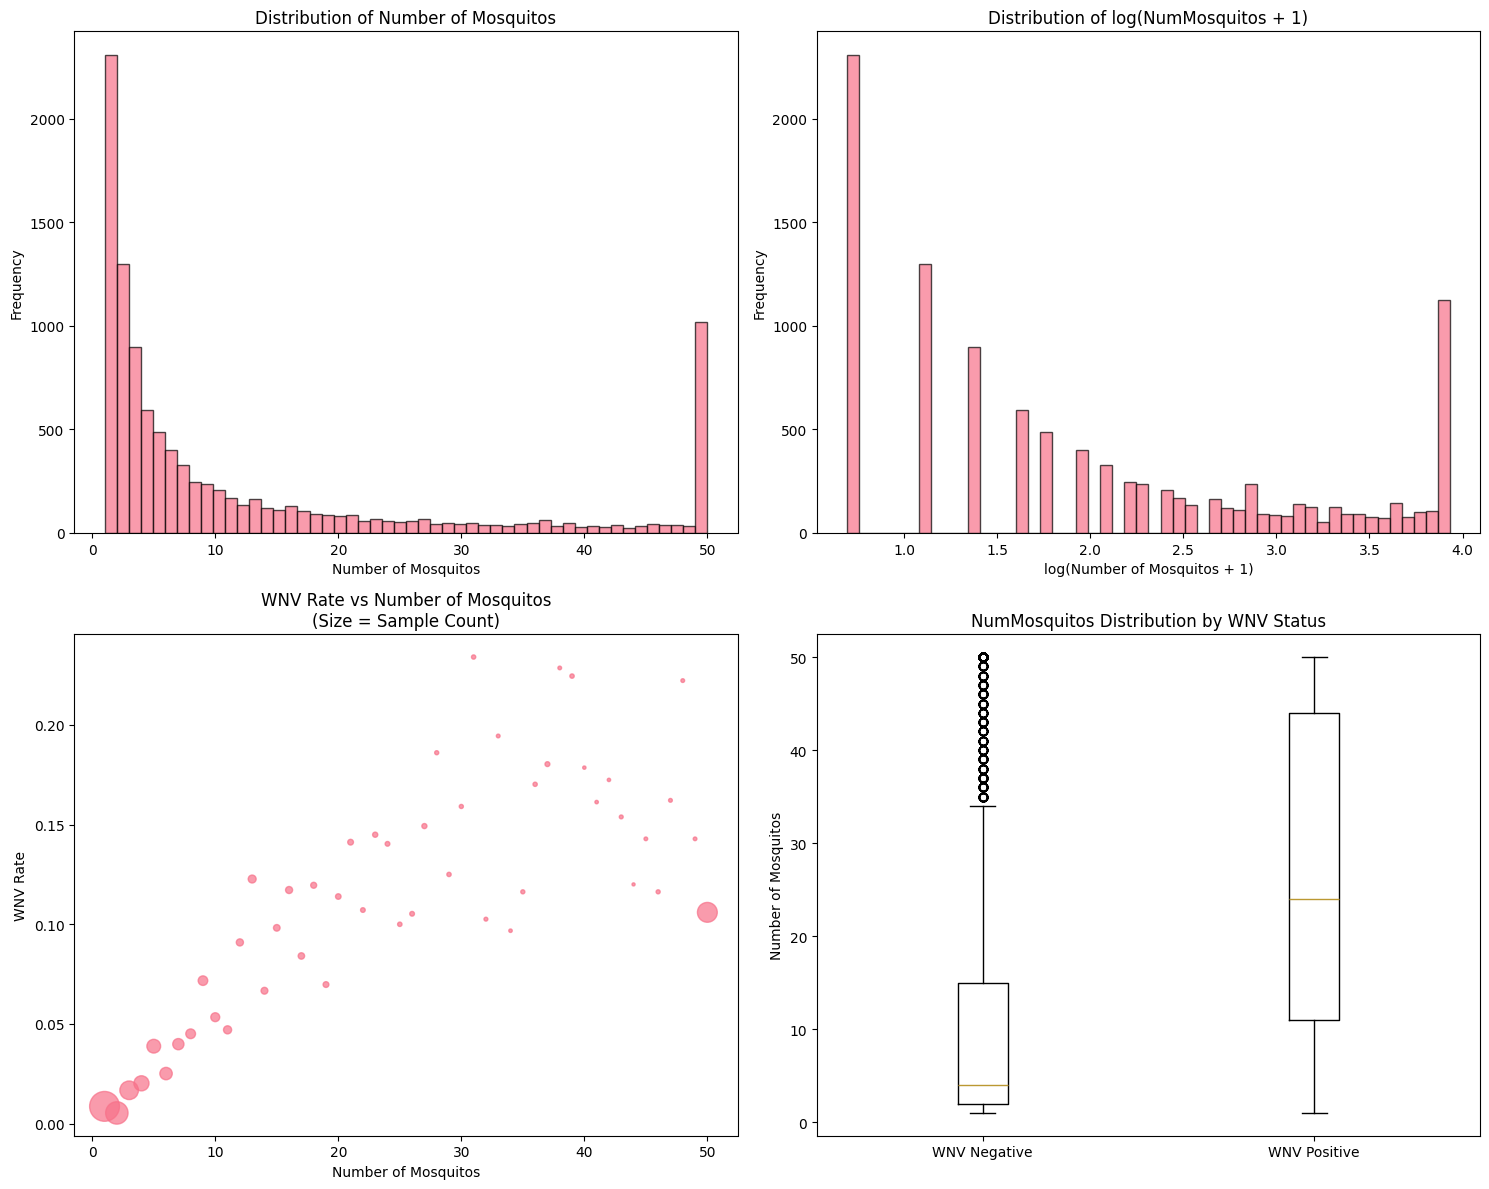


NumMosquitos Statistics:
Mean: 12.85
Median: 5.00
Max: 50
Min: 1

NumMosquitos by WNV Status:
WNV Negative - Mean: 12.11, Median: 4.00
WNV Positive - Mean: 26.35, Median: 24.00


In [10]:
# NumMosquitos analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Distribution of NumMosquitos
axes[0,0].hist(train_df['NumMosquitos'], bins=50, alpha=0.7, edgecolor='black')
axes[0,0].set_title('Distribution of Number of Mosquitos')
axes[0,0].set_xlabel('Number of Mosquitos')
axes[0,0].set_ylabel('Frequency')

# Log scale
axes[0,1].hist(np.log1p(train_df['NumMosquitos']), bins=50, alpha=0.7, edgecolor='black')
axes[0,1].set_title('Distribution of log(NumMosquitos + 1)')
axes[0,1].set_xlabel('log(Number of Mosquitos + 1)')
axes[0,1].set_ylabel('Frequency')

# NumMosquitos vs WNV
mosquito_wnv = train_df.groupby('NumMosquitos')['WnvPresent'].agg(['count', 'sum', 'mean']).reset_index()
mosquito_wnv.columns = ['NumMosquitos', 'Total_Samples', 'WNV_Positive', 'WNV_Rate']
mosquito_wnv = mosquito_wnv[mosquito_wnv['Total_Samples'] >= 10]  # Filter for sufficient samples

axes[1,0].scatter(mosquito_wnv['NumMosquitos'], mosquito_wnv['WNV_Rate'], 
                 s=mosquito_wnv['Total_Samples']/5, alpha=0.7)
axes[1,0].set_title('WNV Rate vs Number of Mosquitos\n(Size = Sample Count)')
axes[1,0].set_xlabel('Number of Mosquitos')
axes[1,0].set_ylabel('WNV Rate')

# Box plot
wnv_neg_mosquitos = train_df[train_df['WnvPresent'] == 0]['NumMosquitos']
wnv_pos_mosquitos = train_df[train_df['WnvPresent'] == 1]['NumMosquitos']

axes[1,1].boxplot([wnv_neg_mosquitos, wnv_pos_mosquitos], 
                 labels=['WNV Negative', 'WNV Positive'])
axes[1,1].set_title('NumMosquitos Distribution by WNV Status')
axes[1,1].set_ylabel('Number of Mosquitos')

plt.tight_layout()
plt.show()

print("\nNumMosquitos Statistics:")
print(f"Mean: {train_df['NumMosquitos'].mean():.2f}")
print(f"Median: {train_df['NumMosquitos'].median():.2f}")
print(f"Max: {train_df['NumMosquitos'].max()}")
print(f"Min: {train_df['NumMosquitos'].min()}")

print("\nNumMosquitos by WNV Status:")
print(f"WNV Negative - Mean: {wnv_neg_mosquitos.mean():.2f}, Median: {wnv_neg_mosquitos.median():.2f}")
print(f"WNV Positive - Mean: {wnv_pos_mosquitos.mean():.2f}, Median: {wnv_pos_mosquitos.median():.2f}")

## 8. Weather Data Analysis

In [11]:
# Weather data overview
print("Weather Data Info:")
print(weather_df.info())
print("\nWeather Data Summary:")
weather_df.describe()

Weather Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Station      2944 non-null   int64  
 1   Date         2944 non-null   object 
 2   Tmax         2944 non-null   int64  
 3   Tmin         2944 non-null   int64  
 4   Tavg         2944 non-null   object 
 5   Depart       2944 non-null   object 
 6   DewPoint     2944 non-null   int64  
 7   WetBulb      2944 non-null   object 
 8   Heat         2944 non-null   object 
 9   Cool         2944 non-null   object 
 10  Sunrise      2944 non-null   object 
 11  Sunset       2944 non-null   object 
 12  CodeSum      2944 non-null   object 
 13  Depth        2944 non-null   object 
 14  Water1       2944 non-null   object 
 15  SnowFall     2944 non-null   object 
 16  PrecipTotal  2944 non-null   object 
 17  StnPressure  2944 non-null   object 
 18  SeaLevel     2944 non-null   

,Station,Tmax,Tmin,DewPoint,ResultSpeed,ResultDir
count,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000
mean,1.500000,76.166101,57.810462,53.457880,6.960666,17.494905
std,0.500085,11.461970,10.381939,10.675181,3.587527,10.063609
min,1.000000,41.000000,29.000000,22.000000,0.100000,1.000000
25%,1.000000,69.000000,50.000000,46.000000,4.300000,7.000000
50%,1.500000,78.000000,59.000000,54.000000,6.400000,19.000000
75%,2.000000,85.000000,66.000000,62.000000,9.200000,25.000000
max,2.000000,104.000000,83.000000,75.000000,24.100000,36.000000


In [12]:
# Convert weather date and clean data
weather_df['Date'] = pd.to_datetime(weather_df['Date'])

# Debug: Check PrecipTotal column
print("Debug - Weather columns:")
print(weather_df.columns.tolist())
print(f"\nPrecipTotal sample values: {weather_df['PrecipTotal'].head(10).tolist()}")
print(f"PrecipTotal unique values (first 10): {weather_df['PrecipTotal'].unique()[:10]}")

# Handle missing values and convert to numeric
numeric_columns = ['Tmax', 'Tmin', 'Tavg', 'DewPoint', 'WetBulb', 'PrecipTotal', 
                  'StnPressure', 'SeaLevel', 'ResultSpeed', 'AvgSpeed']

for col in numeric_columns:
    if col in weather_df.columns:
        # Special handling for PrecipTotal which may have 'T' for trace amounts
        if col == 'PrecipTotal':
            weather_df[col] = weather_df[col].replace('T', '0.005')  # Replace 'T' with small value
            weather_df[col] = weather_df[col].replace('  T', '0.005')  # Handle padded 'T'
        weather_df[col] = pd.to_numeric(weather_df[col], errors='coerce')
    else:
        print(f"Warning: Column {col} not found in weather data")

# Check missing values in weather data
print("\nMissing values in weather data:")
missing_weather = weather_df.isnull().sum()
print(missing_weather[missing_weather > 0])

Debug - Weather columns:
['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint', 'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'Depth', 'Water1', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed']

PrecipTotal sample values: ['0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '  T', '0.00', '  T', '  T']
PrecipTotal unique values (first 10): ['0.00' '  T' '0.13' '0.02' '0.38' '0.60' '0.14' '0.07' '0.11' '0.09']

Missing values in weather data:
Tavg           11
WetBulb         4
PrecipTotal     2
StnPressure     4
SeaLevel        9
AvgSpeed        3
dtype: int64


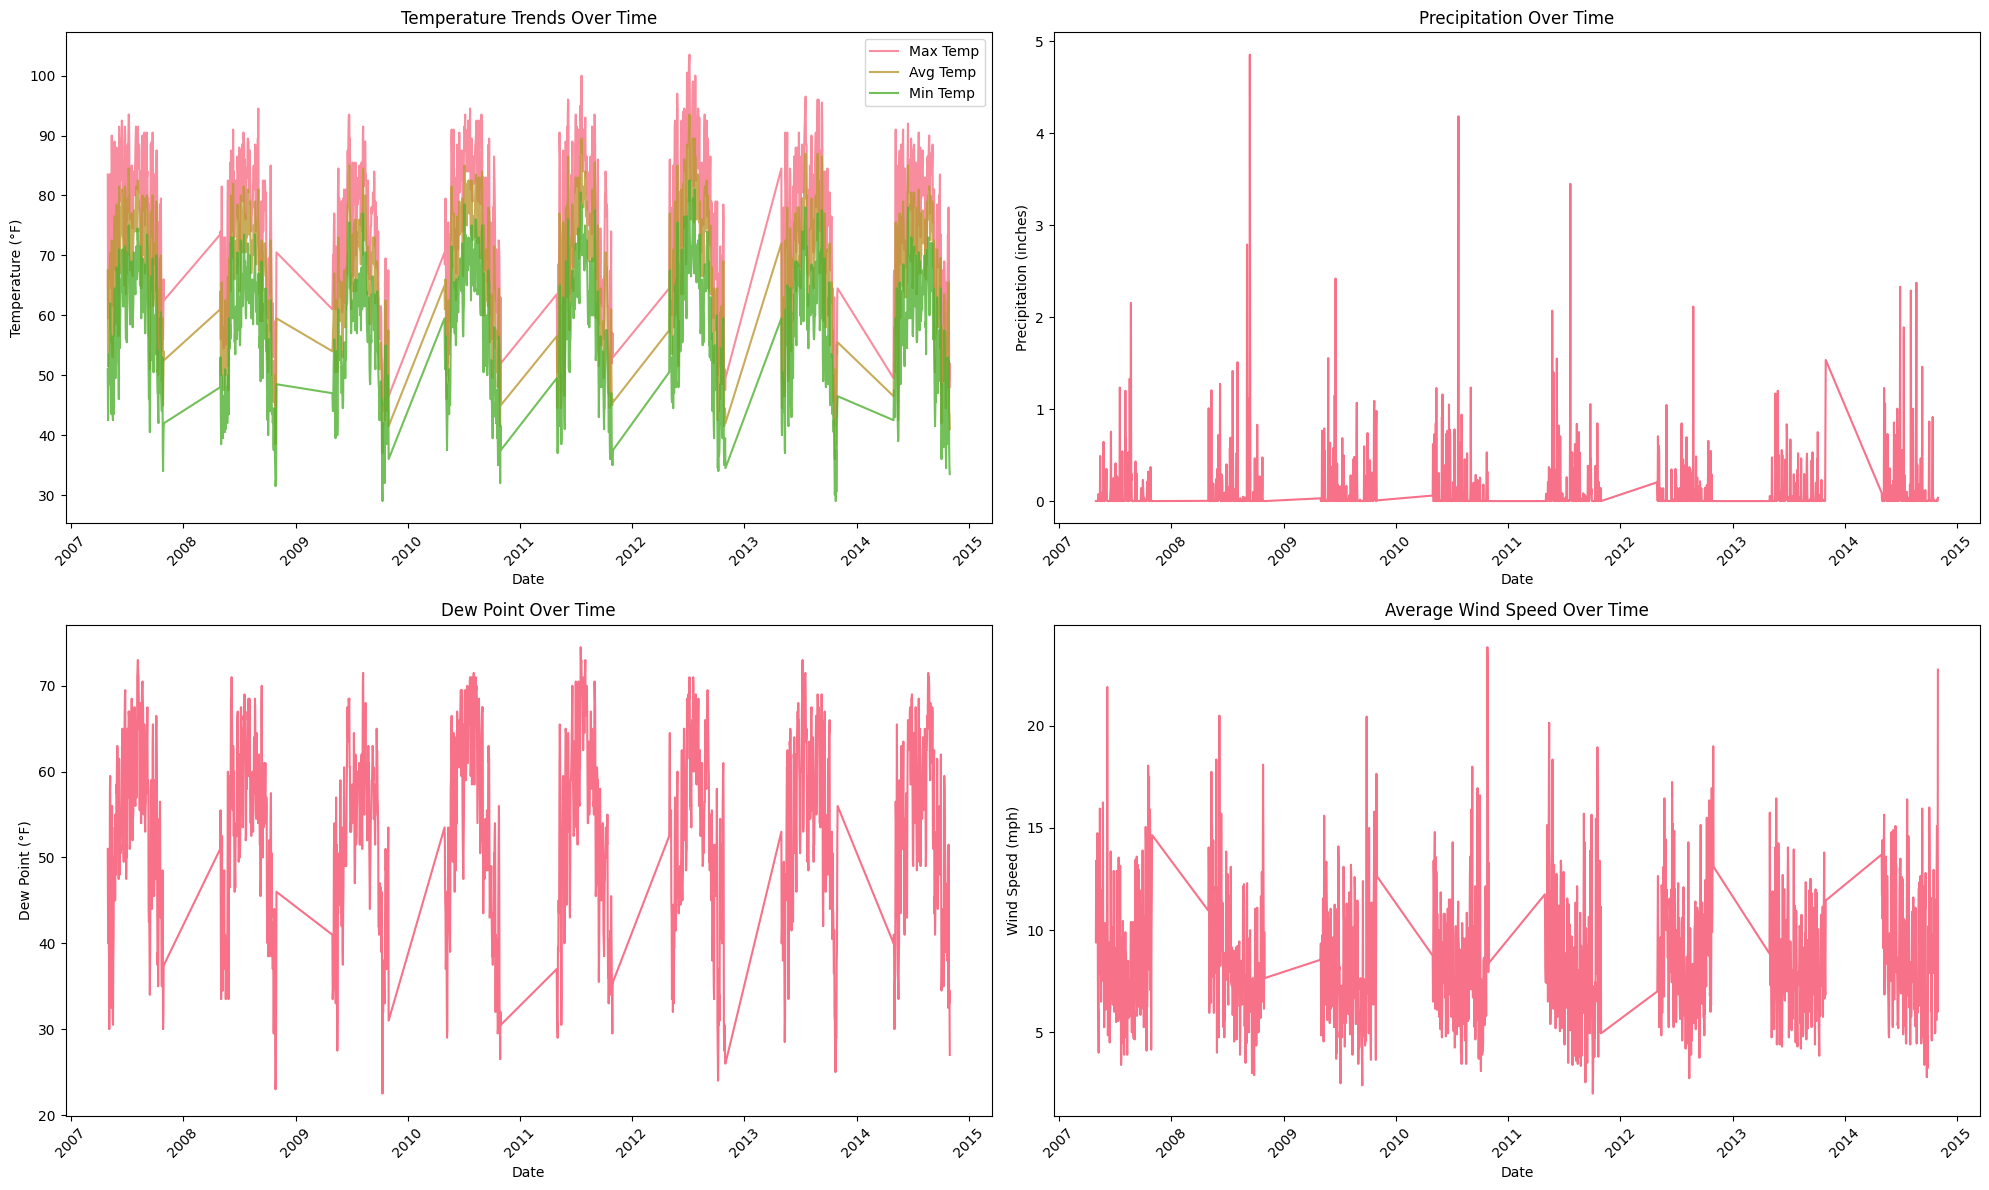

In [14]:
# Weather trends
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Temperature trends
weather_stations = weather_df.groupby(['Date', 'Station'])[['Tmax', 'Tmin', 'Tavg']].mean().reset_index()
weather_avg = weather_stations.groupby('Date')[['Tmax', 'Tmin', 'Tavg']].mean().reset_index()

axes[0,0].plot(weather_avg['Date'], weather_avg['Tmax'], label='Max Temp', alpha=0.8)
axes[0,0].plot(weather_avg['Date'], weather_avg['Tavg'], label='Avg Temp', alpha=0.8)
axes[0,0].plot(weather_avg['Date'], weather_avg['Tmin'], label='Min Temp', alpha=0.8)
axes[0,0].set_title('Temperature Trends Over Time')
axes[0,0].set_xlabel('Date')
axes[0,0].set_ylabel('Temperature (°F)')
axes[0,0].legend()
axes[0,0].tick_params(axis='x', rotation=45)

# Precipitation - check if PrecipTotal exists and has data
precip_stations = weather_df.groupby(['Date', 'Station'])['PrecipTotal'].mean().reset_index()
precip_avg = precip_stations.groupby('Date')['PrecipTotal'].mean().reset_index()
axes[0,1].plot(precip_avg['Date'], precip_avg['PrecipTotal'])
axes[0,1].set_title('Precipitation Over Time')
axes[0,1].set_xlabel('Date')
axes[0,1].set_ylabel('Precipitation (inches)')
axes[0,1].tick_params(axis='x', rotation=45)

# DewPoint
dewpoint_stations = weather_df.groupby(['Date', 'Station'])['DewPoint'].mean().reset_index()
dewpoint_avg = dewpoint_stations.groupby('Date')['DewPoint'].mean().reset_index()
axes[1,0].plot(dewpoint_avg['Date'], dewpoint_avg['DewPoint'])
axes[1,0].set_title('Dew Point Over Time')
axes[1,0].set_xlabel('Date')
axes[1,0].set_ylabel('Dew Point (°F)')
axes[1,0].tick_params(axis='x', rotation=45)

# Wind Speed
wind_stations = weather_df.groupby(['Date', 'Station'])['AvgSpeed'].mean().reset_index()
wind_avg = wind_stations.groupby('Date')['AvgSpeed'].mean().reset_index()
axes[1,1].plot(wind_avg['Date'], wind_avg['AvgSpeed'])
axes[1,1].set_title('Average Wind Speed Over Time')
axes[1,1].set_xlabel('Date')
axes[1,1].set_ylabel('Wind Speed (mph)')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 9. Spray Data Analysis

In [15]:
# Spray data overview
print("Spray Data Info:")
print(spray_df.info())
print("\nSpray Data Summary:")
spray_df.describe()

spray_df['Date'] = pd.to_datetime(spray_df['Date'])
print(f"\nSpray date range: {spray_df['Date'].min()} to {spray_df['Date'].max()}")
print(f"Total spray locations: {len(spray_df)}")
print(f"Unique spray dates: {spray_df['Date'].nunique()}")

Spray Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14835 non-null  object 
 1   Time       14251 non-null  object 
 2   Latitude   14835 non-null  float64
 3   Longitude  14835 non-null  float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB
None

Spray Data Summary:

Spray date range: 2011-08-29 00:00:00 to 2013-09-05 00:00:00
Total spray locations: 14835
Unique spray dates: 10


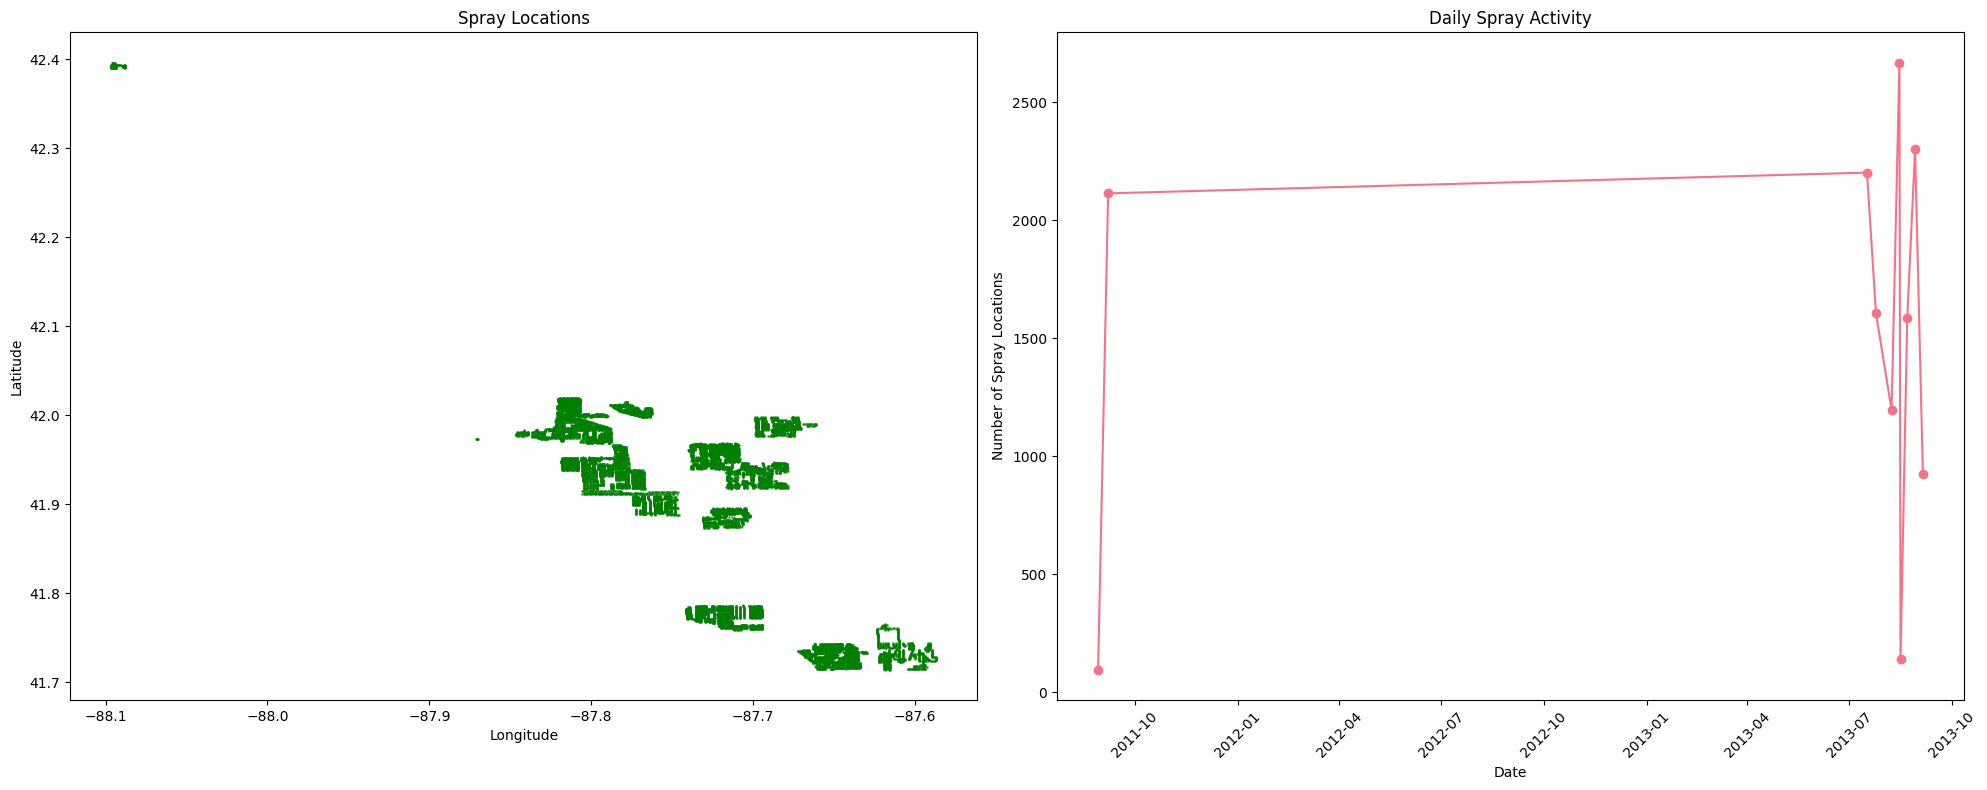

In [16]:
# Spray locations visualization
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Spray locations
axes[0].scatter(spray_df['Longitude'], spray_df['Latitude'], alpha=0.6, s=1, color='green')
axes[0].set_title('Spray Locations')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')

# Spray activity over time
spray_daily = spray_df.groupby('Date').size().reset_index(name='Count')
axes[1].plot(spray_daily['Date'], spray_daily['Count'], marker='o')
axes[1].set_title('Daily Spray Activity')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Number of Spray Locations')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 10. Correlation Analysis

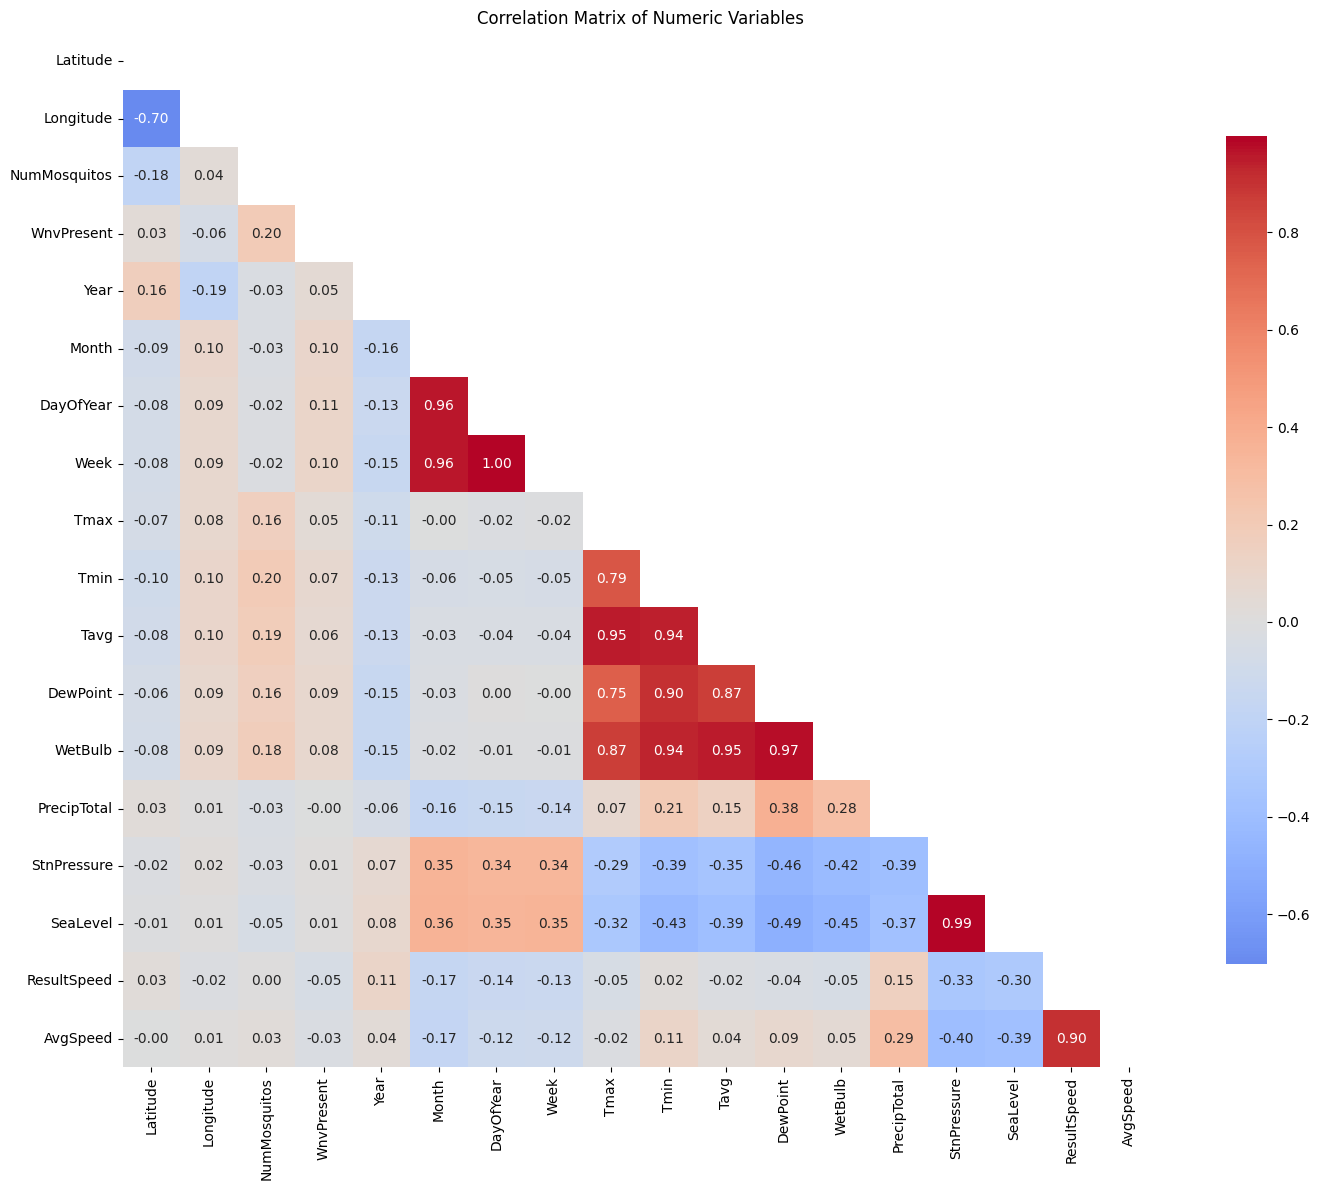


Correlations with WnvPresent (absolute values):
NumMosquitos    0.196820
DayOfYear       0.105767
Week            0.104171
Month           0.100143
DewPoint        0.085883
WetBulb         0.080468
Tmin            0.074048
Tavg            0.064256
Longitude       0.060345
Year            0.050865
Tmax            0.048244
ResultSpeed     0.046298
AvgSpeed        0.029416
Latitude        0.028697
StnPressure     0.009686
SeaLevel        0.006480
PrecipTotal     0.000596
Name: WnvPresent, dtype: float64


In [17]:
# Create a merged dataset for correlation analysis
# First, let's merge train data with weather data
weather_avg_daily = weather_df.groupby('Date')[numeric_columns].mean().reset_index()
train_with_weather = train_df.merge(weather_avg_daily, on='Date', how='left')

# Select numeric columns for correlation
numeric_train_cols = ['Latitude', 'Longitude', 'NumMosquitos', 'WnvPresent', 'Year', 'Month', 'DayOfYear', 'Week']
correlation_cols = numeric_train_cols + [col for col in numeric_columns if col in train_with_weather.columns]

# Calculate correlation matrix
correlation_data = train_with_weather[correlation_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(15, 12))
mask = np.triu(np.ones_like(correlation_data, dtype=bool))
sns.heatmap(correlation_data, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()

# Show correlations with WnvPresent
wnv_correlations = correlation_data['WnvPresent'].abs().sort_values(ascending=False)
print("\nCorrelations with WnvPresent (absolute values):")
print(wnv_correlations[wnv_correlations.index != 'WnvPresent'])

## 11. Key Insights Summary

In [18]:
print("=" * 60)
print("KEY INSIGHTS FROM DATA EXPLORATION")
print("=" * 60)

print("\n1. CLASS IMBALANCE:")
print(f"   - Only {positive_samples/total_samples*100:.2f}% of samples are WNV positive")
print(f"   - Imbalance ratio: {imbalance_ratio:.1f}:1 (negative:positive)")

print("\n2. SPECIES ANALYSIS:")
species_wnv_top = species_wnv.head(3)
print(f"   - {len(species_counts)} different mosquito species")
print(f"   - Top 3 species by WNV rate:")
for _, row in species_wnv_top.iterrows():
    print(f"     * {row['Species']}: {row['WNV_Rate']:.3f} ({row['WNV_Positive']}/{row['Total_Samples']} samples)")

print("\n3. TEMPORAL PATTERNS:")
peak_month = monthly_wnv.loc[monthly_wnv['WNV_Rate'].idxmax()]
peak_week = weekly_wnv.loc[weekly_wnv['WNV_Rate'].idxmax()]
print(f"   - Peak month: {peak_month['Month']} (WNV rate: {peak_month['WNV_Rate']:.3f})")
print(f"   - Peak week: {peak_week['Week']} (WNV rate: {peak_week['WNV_Rate']:.3f})")
print(f"   - Data spans {train_df['Year'].min()} to {train_df['Year'].max()}")

print("\n4. GEOGRAPHIC DISTRIBUTION:")
print(f"   - {len(trap_wnv)} unique trap locations with sufficient data")
print(f"   - {len(trap_wnv[trap_wnv['WNV_Positive'] > 0])} traps have recorded WNV positive samples")
print(f"   - Highest WNV rate at a single trap: {trap_wnv['WNV_Rate'].max():.3f}")

print("\n5. MOSQUITO COUNT PATTERNS:")
print(f"   - Average mosquitos per sample: {train_df['NumMosquitos'].mean():.2f}")
print(f"   - WNV positive samples have higher mosquito counts on average")
print(f"   - WNV Negative: {wnv_neg_mosquitos.mean():.2f} mosquitos")
print(f"   - WNV Positive: {wnv_pos_mosquitos.mean():.2f} mosquitos")

print("\n6. STRONGEST CORRELATIONS WITH WNV:")
top_correlations = wnv_correlations.head(6)  # Top 5 + WnvPresent itself
for var, corr in top_correlations.items():
    if var != 'WnvPresent':
        print(f"   - {var}: {corr:.3f}")

print("\n" + "=" * 60)

KEY INSIGHTS FROM DATA EXPLORATION

1. CLASS IMBALANCE:
   - Only 5.24% of samples are WNV positive
   - Imbalance ratio: 18.1:1 (negative:positive)

2. SPECIES ANALYSIS:
   - 7 different mosquito species
   - Top 3 species by WNV rate:
     * CULEX PIPIENS: 0.089 (240/2699 samples)
     * CULEX PIPIENS/RESTUANS: 0.055 (262/4752 samples)
     * CULEX RESTUANS: 0.018 (49/2740 samples)

3. TEMPORAL PATTERNS:
   - Peak month: 8.0 (WNV rate: 0.101)
   - Peak week: 34.0 (WNV rate: 0.158)
   - Data spans 2007 to 2013

4. GEOGRAPHIC DISTRIBUTION:
   - 130 unique trap locations with sufficient data
   - 98 traps have recorded WNV positive samples
   - Highest WNV rate at a single trap: 0.194

5. MOSQUITO COUNT PATTERNS:
   - Average mosquitos per sample: 12.85
   - WNV positive samples have higher mosquito counts on average
   - WNV Negative: 12.11 mosquitos
   - WNV Positive: 26.35 mosquitos

6. STRONGEST CORRELATIONS WITH WNV:
   - NumMosquitos: 0.197
   - DayOfYear: 0.106
   - Week: 0.104
 